# Website Traffic Analysis (User Journey, Landing Pages & Bounce Proxy)

Goal: Analyze traffic logs to understand user journeys, top landing pages, bounce rates and referral sources.
Tool: Python (Pandas, Matplotlib)
Dataset: traffic.csv

1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



2. Load Dataset

In [ ]:

df = pd.read_csv("traffic.csv")   
print("Shape:", df.shape)
df.head()
        

Shape: (226278, 9)


,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


3. Data Cleaning & Preprocessing

In [3]:
print(df.info())
print("\nMissing values:\n", df.isna().sum())
print("\nEvent counts:\n", df['event'].value_counts())


<class 'pandas.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   event    226278 non-null  str  
 1   date     226278 non-null  str  
 2   country  226267 non-null  str  
 3   city     226267 non-null  str  
 4   artist   226241 non-null  str  
 5   album    226273 non-null  str  
 6   track    226273 non-null  str  
 7   isrc     219157 non-null  str  
 8   linkid   226278 non-null  str  
dtypes: str(9)
memory usage: 15.5 MB
None

Missing values:
 event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

Event counts:
 event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64


In [4]:
# Convert date
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])

# Strip spaces ONLY for object columns
obj_cols = df.select_dtypes(include=["object", "string"]).columns
df[obj_cols] = df[obj_cols].apply(lambda x: x.str.strip())

print("Cleaned Shape:", df.shape)
df.head()


Cleaned Shape: (226278, 9)


,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [5]:
# Creating useful time columns
df["day"] = df["date"].dt.date
df["month"] = df["date"].dt.to_period("M").astype(str)
df["weekday"] = df["date"].dt.day_name()

df[["date", "day", "month", "weekday"]].head()


,date,day,month,weekday
0,2021-08-21,2021-08-21,2021-08,Saturday
1,2021-08-21,2021-08-21,2021-08,Saturday
2,2021-08-21,2021-08-21,2021-08,Saturday
3,2021-08-21,2021-08-21,2021-08,Saturday
4,2021-08-21,2021-08-21,2021-08,Saturday


4. KPI Summary

In [6]:
#Traffic Overview KPI's
print("Total Events:", len(df))
print("Unique linkid:", df["linkid"].nunique())
print("Unique countries:", df["country"].nunique())
print("Unique cities:", df["city"].nunique())


Total Events: 226278
Unique linkid: 3839
Unique countries: 211
Unique cities: 11993


5. Daily Trends

In [7]:
#Daily Traffic Trends
daily_traffic = df.groupby("day").size().reset_index(name="events")
daily_traffic = daily_traffic.sort_values("day")

daily_traffic.head()


,day,events
0,2021-08-19,35361
1,2021-08-20,34112
2,2021-08-21,34083
3,2021-08-22,32633
4,2021-08-23,29808


6. Top Landing Pages

In [8]:
#Top landing pages
top_landing = df["linkid"].value_counts().head(10).reset_index()
top_landing.columns = ["linkid", "events"]
top_landing


,linkid,events
0,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,40841
1,522da5cc-8177-4140-97a7-a84fdb4caf1c,10314
2,e849515b-929d-44c8-a505-e7622f1827e9,9750
3,c2c876ab-b093-4750-9449-6b4913da6af3,6733
4,681d888a-59ce-4acb-b7c5-95dab0c063d9,5512
5,23199824-9cf5-4b98-942a-34965c3b0cc2,5437
6,97105aff-3e40-4c2e-bfeb-563b55e8f5dd,5367
7,d5317591-872a-487d-87cb-10a516643d5f,5352
8,a82e72d8-523f-43ab-9fd0-992605d54b4e,5036
9,a107c329-5d35-4c7d-8050-50bc69ce7dbc,3879


7. Referral Sources (Country & City)

In [9]:
# Top countries and cities
top_countries = df["country"].value_counts().head(5)
top_cities = df["city"].value_counts().head(5)

print("Top 5 Countries:\n", top_countries)
print("\nTop 5 Cities:\n", top_cities)


Top 5 Countries:
 country
Saudi Arabia     47334
India            42992
United States    32558
France           15661
Iraq              8260
Name: count, dtype: int64

Top 5 Cities:
 city
Jeddah       22791
Riyadh       17454
Unknown      16661
Hyderabad     3682
Dammam        3276
Name: count, dtype: int64


8. Content Performance (Top Artists/Tracks)

In [10]:
#Content Performance
top_artists = df["artist"].value_counts().head(10).reset_index()
top_artists.columns = ["artist", "events"]

top_tracks = df["track"].value_counts().head(10).reset_index()
top_tracks.columns = ["track", "events"]

top_artists, top_tracks


(                                              artist  events
 0                                             Tesher   40841
 1                                         Anne-Marie   10650
 2                                       Tundra Beats    9751
 3                                  Surf Mesa, Emilee    7533
 4  DMNDS, Strange Fruits Music, Fallen Roses, Luj...    5512
 5                                      Reyanna Maria    5437
 6                                Shawn Mendes, Tainy    5409
 7                                    50 Cent, Olivia    5367
 8                                        Roddy Ricch    5093
 9                                     Olivia Rodrigo    4115,
                                    track  events
 0                            Jalebi Baby   40841
 1                              Beautiful   10658
 2                          Beautiful Day    9751
 3   ily (i love you baby) (feat. Emilee)    7533
 4                              So Pretty    5664
 5    Calabria (f

9. Bounce Rate (Proxy)

In [11]:
# Events per link per day
link_day = df.groupby(["day", "linkid"]).size().reset_index(name="events")

# Bounce = only 1 event on that day for that link
bounces = link_day[link_day["events"] == 1]

bounce_rate_proxy = (len(bounces) / len(link_day)) * 100

print("Total link-day combinations:", len(link_day))
print("Bounce link-days (events==1):", len(bounces))
print(f"Bounce Rate (Proxy): {bounce_rate_proxy:.2f}%")


Total link-day combinations: 6563
Bounce link-days (events==1): 1799
Bounce Rate (Proxy): 27.41%


🔟 Visualizations 
Daily Traffic Trend

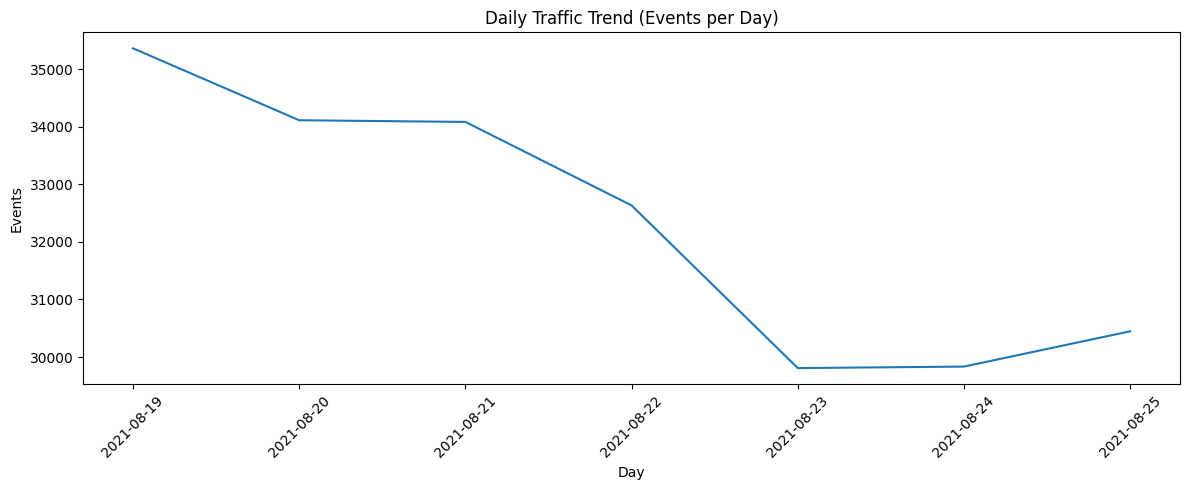

In [12]:

daily_traffic = df.groupby("day").size().reset_index(name="events")
daily_traffic = daily_traffic.sort_values("day")

plt.figure(figsize=(12,5))
plt.plot(daily_traffic["day"], daily_traffic["events"])
plt.title("Daily Traffic Trend (Events per Day)")
plt.xlabel("Day")
plt.ylabel("Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Landing Pages

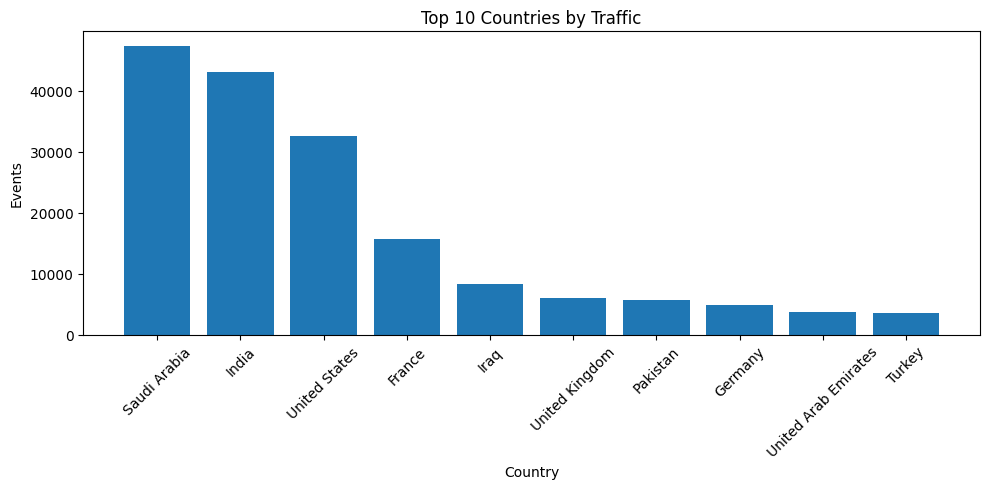

In [13]:
top_countries = df["country"].value_counts().head(10).reset_index()
top_countries.columns = ["country", "events"]

plt.figure(figsize=(10,5))
plt.bar(top_countries["country"], top_countries["events"])
plt.title("Top 10 Countries by Traffic")
plt.xlabel("Country")
plt.ylabel("Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top Countries

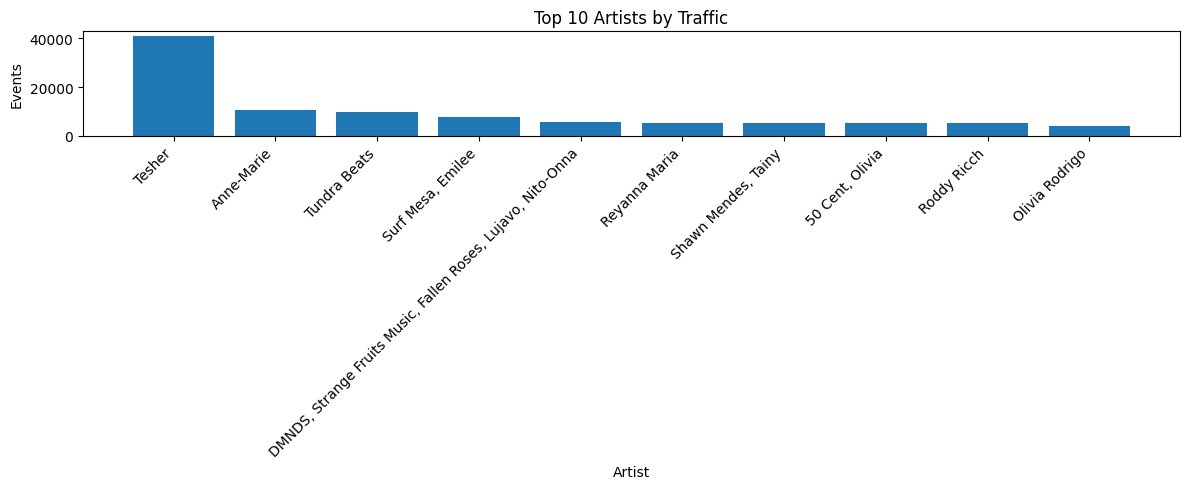

In [14]:
top_artists = df["artist"].value_counts().head(10).reset_index()
top_artists.columns = ["artist", "events"]

plt.figure(figsize=(12,5))
plt.bar(top_artists["artist"], top_artists["events"])
plt.title("Top 10 Artists by Traffic")
plt.xlabel("Artist")
plt.ylabel("Events")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [15]:
top_link = df["linkid"].value_counts().idxmax()
top_track = df["track"].value_counts().idxmax()
top_country = df["country"].value_counts().idxmax()

print("Most common landing linkid:", top_link)
print("Most popular track:", top_track)
print("Top country:", top_country)


Most common landing linkid: 2d896d31-97b6-4869-967b-1c5fb9cd4bb8
Most popular track: Jalebi Baby
Top country: Saudi Arabia


# Business Recommendations 
 5 Optimizations for Alfido Tech

- Improve conversion on top landing linkid using stronger CTA buttons (“Listen Now”, “Open in App”).

- Fix tracking issue for “Unknown” city to improve reporting accuracy.

- Run localized campaigns for top markets (Saudi Arabia & India).

- Reduce bounce proxy by improving mobile speed and landing clarity.

- Promote top-performing tracks/artists with featured sections and recommendations.

# Final Conclusion 
This analysis identified the strongest landing links, top traffic regions, and content performance. A bounce proxy of 27.41% indicates users often leave after a single interaction, so improving landing experience and localization can increase conversions.